Notes in this code found here : https://youtu.be/99MN-rl8jGY

# Naive Bayes
 
 A machine learning method you can use to predict the likelihood that an event will occur given evidence that's present in your data. 
 
 ## Three Types of Naive Bayes: 
 
- Multinomial: Good for when your features (categorical or continuous) describe discrete frequency counts (eg word counts) 
- Bernoulli: good for making predictionrs from binary features 
- Gaussian: good for making predictions from normally distributed features 


## Naive Bayes Use Cases: 
- Spam detection 
- Customer classification 
- Credit risk prediction 
- Health risk prediction 

## Naive Bayes assumptions
- Predictors are independent of each other 
- A priori assumption: this is an assumption that the past conditions still hold true. When we make predictions from historical values, we will get incorrect results if present circumstances have changed. 
- All regression models maintain an a priori assumptions as well. 

Scikit-learn:
	• GaussianNB : applied to continuous data 
		○ Stores the average values as well as the standard deviation of each feature for each class
	• BernoulliNB: assumes binary data 
		○ Counts how often every feature of each class is not zero
	• MultinomialNB: assumes count data 
		○ Takes into account the average value of each feature for each class 
	• Bernoulli and multinomial are most often used for test data classification
	• Coef_ is not the same as w (feature coefficient in the equation) 

Tuning Parameters: 
	• Multinomial and bernoulli: 
		• Alpha (sort of robust to his parameter though, somewhat improves accuracy) 
			§ Large alpha : more smoothing - less complex models 
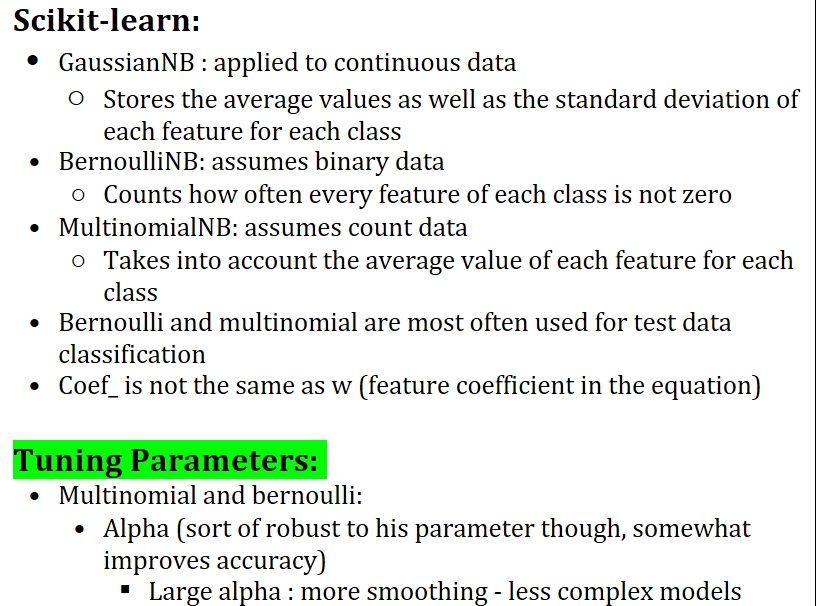
  
## Code: 

In [6]:
import numpy as np 
import pandas as pd 

import urllib.request

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [8]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

raw_data = urllib.request.urlopen(url)

dataset = np.loadtxt(raw_data, delimiter = ',')
print(dataset[0])

[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


In [9]:
X = dataset[:, 0:48]
y = dataset[:, -1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 17)

### BernoulliNB

In [12]:
BernNB = BernoulliNB(binarize = True)
BernNB.fit(X_train, y_train)
print(BernNB)

print(BernNB.score(X_test, y_test))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.8558262014483212
0.8558262014483212


### MultinomialNB

In [14]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)

print(MultiNB.score(X_test, y_test))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.8736010533245556


### GaussianNB

In [15]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)

print(GausNB.score(X_test, y_test))

GaussianNB(priors=None, var_smoothing=1e-09)
0.8130348913759052


### BernoulliNB with new binarize paramter

In [16]:
BernNB = BernoulliNB(binarize = 0.1) # not sure what this does....
BernNB.fit(X_train, y_train)
print(BernNB)

print(BernNB.score(X_test, y_test))

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)
0.8953258722843976
